In [16]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
from gtda.homology import VietorisRipsPersistence as vrp
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd
from itertools import chain, combinations
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from transformers import AutoConfig, AutoModelForSequenceClassification, AutoTokenizer
from gdeep.optimisation import PersistenceGradient, TopoLoss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


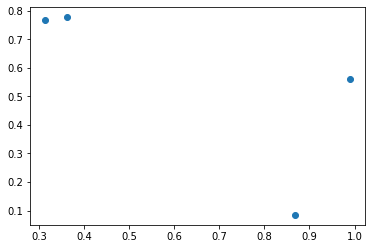

In [57]:
points = torch.rand(4, 2)
A = torch.cdist(points, points)

plt.scatter(points[:, 0], points[:, 1])
plt.show()

In [130]:
vr = vrp(homology_dimensions=[0, 1, 2])
points = np.array([[[0.0], [1.0], [3.0]]])
Xt = vr.fit_transform(points)
vr.plot(Xt)
A = torch.cdist(torch.tensor(points[0]), torch.tensor(points[0]))

In [121]:
np.array([[0], [1], [2]]).shape

(3, 1)

In [131]:
#A = torch.tensor(
#    [
#        [0, 1, 3, 4],
#        [1, 0, 2, 5],
#        [3, 2, 0, 6],
#        [4, 5, 6, 0],
#    ], dtype=torch.float32
#)

homology_dimensions = [0, 1, 2]

topo_loss = TopoLoss(
                    homology_dimensions=homology_dimensions,
                    collapse_edges=False
                    )

In [132]:
list(topo_loss.powerset([1, 2, 3], max_length=2))

[(), (1,), (2,), (3,), (1, 2), (1, 3), (2, 3)]

In [133]:
list(topo_loss.powerset(list(range(0,len(A))), max(homology_dimensions)+2))[1:]

[(0,), (1,), (2,), (0, 1), (0, 2), (1, 2), (0, 1, 2)]

In [134]:
topo_loss._simplicial_pairs_of_indices(A)

[((0, 0),),
 ((1, 1),),
 ((2, 2),),
 ((0, 1),),
 ((0, 2),),
 ((1, 2),),
 ((0, 1), (0, 2), (1, 2))]

In [135]:
topo_loss._compute_filtration(A)

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 3.0]

In [145]:
pairs = topo_loss._compute_pairs(A)
pairs

array([[0., 1.],
       [0., 2.],
       [0., 0.],
       [0., 0.]])

In [146]:
sorted_filtration_list

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 3.0]

In [147]:
sorted_filtration_list = topo_loss._compute_filtration(A)
for x in chain(*pairs):
    print(x)


0.0
1.0
0.0
2.0
0.0
0.0
0.0
0.0


In [142]:
sorted_filtration_list

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 3.0]

In [159]:
af = lambda x: round(x, 7)
af(np.pi)

approx_pairs = [af(x) for x in chain(*pairs)]

phi = sorted_filtration_list

indices_in_phi_of_pairs = [i for i in range(len(phi)) if af(phi[i]) in approx_pairs]

persistence_pairs_array = -np.ones((len(indices_in_phi_of_pairs),2), dtype=np.int32)

for i in indices_in_phi_of_pairs:
    try:
        temp_index = approx_pairs.index(af(phi[i]))
        approx_pairs[temp_index] = np.inf
        persistence_pairs_array[temp_index // 2, temp_index % 2]= i
    except:
        print("blub")

[0.0, 0.0, 0.0, 1.0, 2.0, 3.0, 3.0]

In [163]:
list(map(af, list(chain(*pairs))))

[0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]

In [164]:
indices_in_phi_of_pairs

[0, 1, 2, 3, 4]

In [160]:
approx_pairs

[inf, inf, inf, inf, inf, 0.0, 0.0, 0.0]

In [161]:
 [af(x) for x in chain(*pairs)]

[0.0, 1.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]

In [27]:
X = torch.rand(10, 10)
torch.einsum('ij, ij-> ', X, X) #torch.trace(X.mm(X.T))

tensor(30.3731)

In [28]:
torch.trace(X.mm(X.T))

tensor(30.3731)

In [31]:
vr = vrp()
vr.fit_transform([X.detach().numpy()]).shape

/home/reinauer/.local/lib/python3.8/site-packages/gtda/homology/simplicial.py:208: DataDimensionalityWarning: All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.
  check_point_clouds(X, accept_sparse=True,
/home/reinauer/.local/lib/python3.8/site-packages/gtda/homology/simplicial.py:270: DataDimensionalityWarning: All arrays/matrices are square. This is consistent with a collection of distance/adjacency matrices, but the entries will be treated as collections of vectors in Euclidean space.
  X = check_point_clouds(X, accept_sparse=True,


(1, 11, 3)

In [32]:
round(np.pi, 7)

3.1415927

In [1]:
!pip3 install jupyter-tabnine

In [1]:
!pip3 install jupyter_contrib_nbextensions

     |████████████████████████████████| 20.9 MB 2.9 MB/s 
     |████████████████████████████████| 861 kB 2.6 MB/s 
     |████████████████████████████████| 479 kB 2.7 MB/s 
     |████████████████████████████████| 5.4 MB 3.1 MB/s 
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=ea27efad23f6a3c3e9a7375c100d32110adc19237c788f546e4d754bca47f5dc
  Stored in directory: /home/reinauer/.cache/pip/wheels/4d/ba/f4/b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465825 sha256=a6608ba2647c05c80509a957b989b0f15336f60d909f063b6fcb684af0200872
  Stored in directory: /home/reinauer/.cache/pip/wheels/e3/3a/b3/a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
Successfully built jupyter-latex-envs jupyter-nbextensions-configurator


In [3]:
!pip3 install jupyter_nbextensions_configurator

In [4]:
!jupyter contrib nbextension install --user

p/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/help_panel -> help_panel
[I 22:50:13 InstallContribNbextensionsApp] Making directory: /home/reinauer/.local/share/jupyter/nbextensions/help_panel/
[I 22:50:13 InstallContribNbextensionsApp] Copying: /home/reinauer/anaconda3/envs/giottodeep/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/help_panel/help_panel_ext_fullscreen.png -> /home/reinauer/.local/share/jupyter/nbextensions/help_panel/help_panel_ext_fullscreen.png
[I 22:50:13 InstallContribNbextensionsApp] Copying: /home/reinauer/anaconda3/envs/giottodeep/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/help_panel/readme.md -> /home/reinauer/.local/share/jupyter/nbextensions/help_panel/readme.md
[I 22:50:13 InstallContribNbextensionsApp] Copying: /home/reinauer/anaconda3/envs/giottodeep/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/help_panel/help_panel.js -> /home/reinauer/.local/share/jupyter/

In [5]:
!jupyter nbextensions_configurator enable --user

Enabling: jupyter_nbextensions_configurator
- Writing config: /home/reinauer/.jupyter
    - Validating...
      jupyter_nbextensions_configurator 0.4.1 OK
Enabling notebook nbextension nbextensions_configurator/config_menu/main...
Enabling tree nbextension nbextensions_configurator/tree_tab/main...


In [6]:
!pip3 install jupyter-tabnine --user

In [7]:
!jupyter nbextension install --py jupyter_tabnine --user

Traceback (most recent call last):
  File "/home/reinauer/.local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/home/reinauer/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/reinauer/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/home/reinauer/.local/lib/python3.8/site-packages/notebook/nbextensions.py", line 983, in start
    super(NBExtensionApp, self).start()
  File "/home/reinauer/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 243, in start
    self.subapp.start()
  File "/home/reinauer/.local/lib/python3.8/site-packages/notebook/nbextensions.py", line 711, in start
    self.install_extensions()
  File "/home/reinauer/.local/lib/python3.8/site-packages/notebook/nbextensions.py", line 682, in install_extensions
    full_dests = 

In [10]:
!jupyter nbextension install --py jupyter_tabnine

Traceback (most recent call last):
  File "/home/reinauer/.local/bin/jupyter-nbextension", line 8, in <module>
    sys.exit(main())
  File "/home/reinauer/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/home/reinauer/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/home/reinauer/.local/lib/python3.8/site-packages/notebook/nbextensions.py", line 983, in start
    super(NBExtensionApp, self).start()
  File "/home/reinauer/.local/lib/python3.8/site-packages/jupyter_core/application.py", line 243, in start
    self.subapp.start()
  File "/home/reinauer/.local/lib/python3.8/site-packages/notebook/nbextensions.py", line 711, in start
    self.install_extensions()
  File "/home/reinauer/.local/lib/python3.8/site-packages/notebook/nbextensions.py", line 682, in install_extensions
    full_dests = 

In [9]:
for i in range(1)